In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [2]:
x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, Y_train, Y_test = train_test_split(x,y,stratify=y,random_state=42)

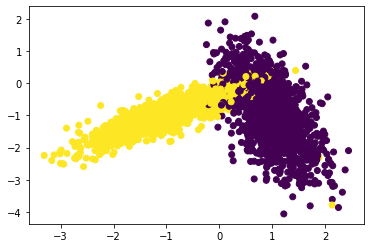

In [3]:
%matplotlib inline
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=Y_test)
plt.show()

In [4]:
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    
    # Implementing random sampling over given tuple range of hyperparameter. 10 samples are considered here. 
    list_param_range= sorted(list(random.sample(range(param_range[0], param_range[1]), 10)))
    params ={'n_neighbors': list_param_range}
    
    trainscores = []
    testscores = []
    k_value= []
    for k in tqdm(params['n_neighbors']):
        print(k)
        trainscore_per_param = []
        testscore_per_param = []
        
        #Getting train,test indices for random CV
        x = range(len(X_train))
        groups = np.array_split(np.array(x),folds)
        for num in range(folds):
            test_indices = list(groups[num])
            train_indices = list(np.setdiff1d(groups, test_indices))
            
        #Selecting data points based on train , test indices
            x_train = X_train[train_indices]
            y_train = Y_train[train_indices]
            x_test = X_train[test_indices]
            y_test = Y_train[test_indices]
            
           
            classifier.n_neighbors = k
            classifier.fit(x_train, y_train)
            
            y_predicted = classifier.predict(x_test)
            testscore_per_param.append(accuracy_score(y_test, y_predicted))
            
            y_predicted = classifier.predict(x_train)
            trainscore_per_param.append(accuracy_score(y_train, y_predicted))
            
            
        trainscores.append(np.mean(np.array(trainscore_per_param)))
        testscores.append(np.mean(np.array(testscore_per_param)))
        k_value.append(k)
    return trainscores,testscores, k_value
        

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import random
import warnings
warnings.filterwarnings("ignore")

classifier = KNeighborsClassifier()

param_range = (1,50)
folds= 3

train_scores, cv_scores,k_value = RandomSearchCV(X_train,Y_train,classifier, param_range, folds)

print('Train_scores:', train_scores)
print('cv_scores:', cv_scores)
print('K_values:', k_value)

  0%|          | 0/10 [00:00<?, ?it/s]

1


 10%|█         | 1/10 [00:01<00:13,  1.55s/it]

2


 20%|██        | 2/10 [00:03<00:12,  1.57s/it]

7


 30%|███       | 3/10 [00:04<00:10,  1.56s/it]

11


 40%|████      | 4/10 [00:06<00:09,  1.57s/it]

29


 50%|█████     | 5/10 [00:08<00:08,  1.68s/it]

35


 60%|██████    | 6/10 [00:10<00:07,  1.92s/it]

36


 70%|███████   | 7/10 [00:12<00:05,  1.98s/it]

39


 80%|████████  | 8/10 [00:14<00:03,  1.99s/it]

42


 90%|█████████ | 9/10 [00:16<00:01,  1.93s/it]

45


100%|██████████| 10/10 [00:18<00:00,  1.83s/it]

Train_scores: [1.0, 0.9677333333333333, 0.9608, 0.9596666666666667, 0.9578000000000001, 0.9576666666666666, 0.9580666666666667, 0.9579333333333334, 0.9582, 0.9578000000000001]
Test_scores: [0.9296000000000001, 0.9409333333333333, 0.9518666666666666, 0.9540000000000001, 0.9550666666666667, 0.9553333333333334, 0.9556, 0.9556, 0.956, 0.9565333333333333]
K_values: [1, 2, 7, 11, 29, 35, 36, 39, 42, 45]


In [16]:
difference = [a - b for a, b in zip(train_scores, cv_scores)] 
difference_in_scores = dict(zip(difference, k_value))
print(difference_in_scores)

{0.07039999999999991: 1, 0.026800000000000046: 2, 0.008933333333333349: 7, 0.005666666666666598: 11, 0.0027333333333333654: 29, 0.0023333333333331874: 35, 0.002466666666666728: 36, 0.0023333333333334094: 39, 0.0022000000000000908: 42, 0.0012666666666667492: 45}


### 
It is observed that for K=45, difference between train_accuracy and Cross validation accuracy is least.Same can be observed in below graph

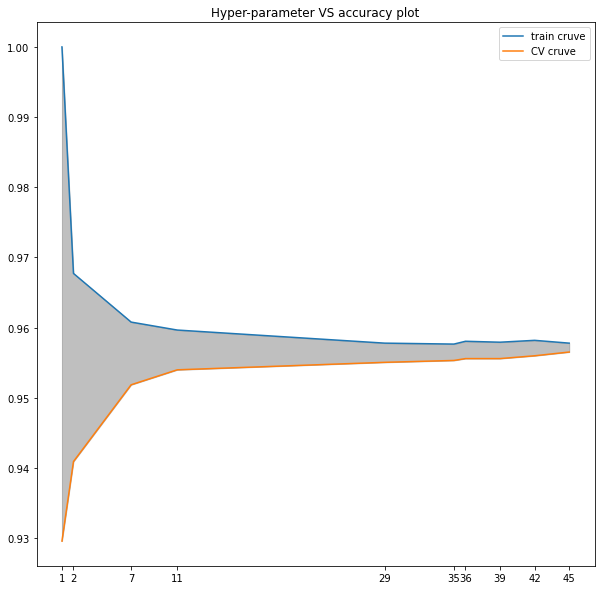

In [17]:
%matplotlib inline
plt.figure(figsize = (10,10))
plt.plot(k_value,train_scores, label='train cruve',markersize = 40)
plt.plot(k_value,cv_scores, label='CV cruve',markersize = 40)
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.xticks(k_value)
plt.fill_between(k_value, train_scores, cv_scores, color="grey", alpha=0.5)

In [19]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

###
As K=45 is best value of hyper parameter obtained for this trail of random sampling, performing KNN classification over that K value below.

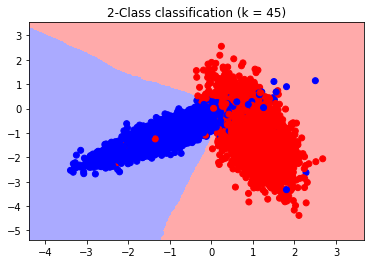

In [21]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 45)
neigh.fit(X_train, Y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], Y_train, neigh)